<b>Coding to Julia 1.0.5</b>

微粒子 Brownian motion の系を考える.
このとき,

* 微粒子の質量 $m$
* 微粒子に及ぼされる粘性抵抗力の係数 $\gamma$
* 標準正規分布に従う乱数で与えられるランダム力 $\eta(t)$ 

とする.

また,

* 初期位置 $x_0$
* 初速度 $v_0$
* 時間ステップ $N$
* Brownian motion のサンプル数 $M$
* 時間刻み幅 $\Delta t$

としておく,

In [9]:
using Distributions


#conditions
m = 1.0 #mass
γ = 1.0 #resistance coefficient
η = randn() #random force

x₀ = 0.0 #initial position
v₀ = 1.0 #initial velocity

N = 120 #time step
M = 100000 #number of samples
Δt = 0.5 #time step width

0.5

Brownian motionを記述する運動方程式としては, Langevin方程式がある．

いま,一次元で粒子の運動を考え,時刻 $t$ における粒子の位置を $x(t)$ とすると,一次元Langevin方程式は

$$ m\frac{d^2x}{dt^2}(t) = -\gamma\frac{dx}{dt}(t) + \eta(t) $$

のような形で与えられる．

ここで右辺第一項は,粘性抵抗力で,速度に比例して逆向きに作用する．

In [10]:
#Langevin equation discretization
function Langevin(xᵢ,vᵢ,η)
    vᵢ₊₁ = vᵢ - (γ*vᵢ - η)/m * Δt
    vᵢ = vᵢ₊₁
    xᵢ₊₁ = xᵢ + vᵢ*Δt
    xᵢ = xᵢ₊₁
    return xᵢ, vᵢ
end

Langevin(x₀,v₀,η)

(0.03141637410086129, 0.06283274820172258)

ここで,時刻 $t = 0$ のときの位置を $x(0)$ , 時刻 $t = t'$ のときの位置を $x(t')$ とすると,その変位 $x(t')-x(0)$ は**末端間距離** $R$ に対応する.

このとき, 任意時間 $t$ におけるBrownian motion の抽出サンプル数 $N$ に対する平均二乗末端間距離 $<R^2>$ は次式で与えられる.

$$ <R^2> = \frac{1}{N}\sum^N_{i=1}(x(t')-x(0))^2 $$


In [11]:
ΣR²_list = zeros(N+1) #sum of squared of R
R²ₐᵥₑ_list = [] # list of mean-square value <R²>
xᵢ⁽ʲ⁾_list = [] # list of displacement x (xᵢ⁽ʲ⁾ is i-by-j matrix)

for j in 1:M  # j is iteration of samples
    #variable initialization
    R²_list = [0]
    x_list = [x₀]
    x,v = x₀, v₀
    for i in 1:N  # i is time step of samples
        η = randn() #random force
        x,v = Langevin(x,v,η)
        x_list = hcat(x_list,[x]) # hcat is that function Adding elements
        R²_list = hcat(R²_list, [(x-x₀)^2]) # end-to-end distance R = x - x₀
    end
    xᵢ⁽ʲ⁾_list = vcat(xᵢ⁽ʲ⁾_list,[x_list'])
    ΣR²_list += vec(R²_list)
end

R²ₐᵥₑ_list = ΣR²_list/M

121-element Array{Float64,1}:
  0.0                
  0.12537855738464354
  0.34370384635831347
  0.5836907519986808 
  0.8310335646385091 
  1.0771510271613158 
  1.32508159587967   
  1.5789181932632175 
  1.8286152868952215 
  2.0794646874297222 
  2.333145917205179  
  2.5840101996716633 
  2.8376010647951238 
  ⋮                  
 27.192749325531803  
 27.452581240250133  
 27.69356732701659   
 27.950758642683443  
 28.21122055419255   
 28.460832310522868  
 28.703037798210694  
 28.949048969371105  
 29.208505912739202  
 29.452246122928035  
 29.686349013251363  
 29.913444336719866  

1905年に Einstein は“Investigation on the Theory of the Brownian Movement”の論文において,微粒子の二乗平均変位 $<x^2>$ が時間 $t$ に比例することを導いた.

これより,統計的に計算した平均二乗末端間距離 $<R^2>$ も時間 $t$ に対し,線形関係が得られると考えられる.

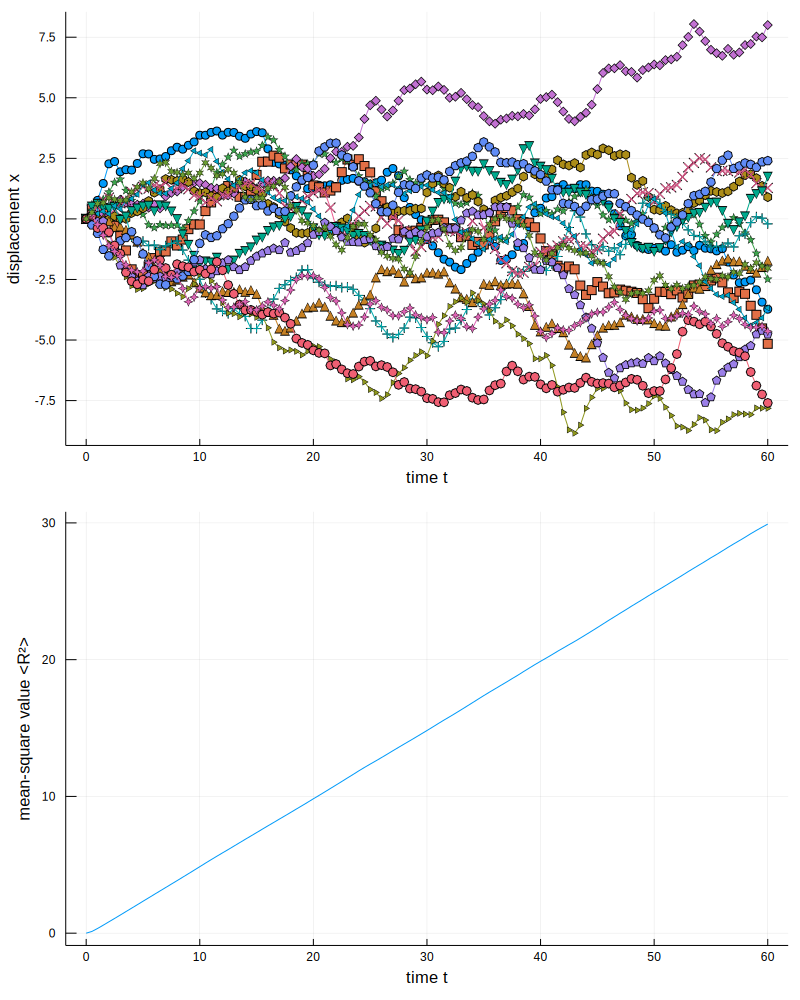

In [15]:
using Plots
gr()
t_list = [0:Δt:N*Δt]
plot(
    plot(t_list, xᵢ⁽ʲ⁾_list[20:35], marker = :auto, legend = :none, xlabel="time t", ylabel="displacement x"),
    plot(t_list, R²ₐᵥₑ_list, legend = :none, xlabel="time t", ylabel="mean-square value <R²>"),
    layout=(2,1),
    size=(800,1000),
    
)